<a href="https://colab.research.google.com/github/MathMachado/Python_RFB/blob/DS_Python/3DP_5_Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3DP_FEATURE SELECTION

![FeatureSelection](https://github.com/MathMachado/Python_RFB/blob/master/Material/FeatureSelection.png?raw=true)

[Fonte](https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb)


<hr>

### Agenda
* Introduction to Feature Selection
* VarianceThreshold
* Chi-squared stats
* ANOVA using f_classif
* Univariate Linear Regression Tests using f_regression
* F-score vs Mutual Information
* Mutual Information for regression using mutual_info_regression
* SelectFromModel
* Recursive Feature Elemination
* Feature Selection With Random Forest
* Feature Selection With XGBoost
* Feature Selection using PCA (Principal Components Analysis)

<hr>

## 1. Introduction to Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets
* Below we will discuss univariate selection methods
* Also, feature elimination method

In [0]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [0]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [0]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
df['A'] = le.fit_transform(df.A)

In [0]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [0]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [0]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [0]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

## 3. Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete
* Dataframe: [tennis.csv](https://www.kaggle.com/m1thr4nd1r/tennis)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/MathMachado/Python_RFB/master/Dataframes/tennis.csv?token=AGDJQ66WIGWSM47VKX53TBC5NO4YA')

In [0]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [0]:
df

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [0]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [0]:
chi2

array([0.01196581, 2.02814815, 0.02222222, 1.4       , 0.4       ])

* Higher value means more important feature for target

## 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer_data = load_breast_cancer()

In [0]:
X = cancer_data.data
Y = cancer_data.target

In [0]:
chi2, pval = feature_selection.f_classif(X,Y)

In [0]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

* Each value represents importance of a feature

## 5. Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [0]:
from sklearn.datasets import california_housing

In [0]:
house_data = california_housing.fetch_california_housing()

In [0]:
X,Y = house_data.data, house_data.target

In [0]:
F, pval = feature_selection.f_regression(X,Y)

In [0]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

* Columns with top F values are the selected features 

## 7. Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [0]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

## 11. SelectFromModel
* Selecting important features from model weights
* The estimator should support 'feature_importances'

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
clf = LinearRegression()
sfm = feature_selection.SelectFromModel(clf, threshold=0.25)

In [0]:
sfm.fit_transform(boston.data, boston.target).shape

(506, 7)

In [0]:
boston.data.shape

(506, 13)

## 12. Recursive Feature Elimination
* Uses an external estimator to calculate weights of features
* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
* Then, the least important features are pruned from current set of features. 
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [0]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
data = selector.fit_transform(X, y)

In [0]:
X.shape

(50, 10)

In [0]:
data.shape

(50, 5)

In [0]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])

## Feature Selection With Random Forest
* Para demonstrar este método, vou utilizar o Boston Housing Price dataframe.

### Carregar o dataframe
* [Aqui](https://en.wikipedia.org/wiki/Iris_flower_data_set) você obterá mais informações sobre o dataframe iris. Confira.

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()
X= iris['data']
y= iris['target']

df_iris = pd.DataFrame(np.c_[X, y], columns= np.append(iris['feature_names'], ['target']))
df_iris['target2']= df_iris['target']
# Create a list of feature names
lIris_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

df_iris['target'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_iris= df_iris.rename(columns={'sepal length (cm)': 'Sepal Length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})

df_iris.head()

,Sepal Length,sepal width,petal length,petal width,target,target2
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


* A variável-resposta que estamos tentando prever/explicar é categórica. Portanto, vamos usar um método de Classificação.

* SelectFromModel selecionará os atributos cuja importância seja maior do que a importância média de todos os recursos por padrão, mas podemos alterar esse limite se quisermos.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [0]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [0]:
# Create a random forest Regressor
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Os atributos mais importantes são:

In [0]:
# Print the name and gini importance of each feature
for feature in zip(lIris_labels, clf.feature_importances_):
    print(feature)

('Sepal Length', 0.11024282328064558)
('Sepal Width', 0.016255033655398383)
('Petal Length', 0.45028123999239505)
('Petal Width', 0.42322090307156096)


* Os scores acima representam a importância de cada variável.
    * A soma dos scores resulta em 100%;
    * Os atributos 'Petal Length' (Score= 0.45) e 'Petal Width' (Score= 0.42)são os mais importantes.
    * Combinados, as duas variáveis mais importantes somam ~0.86.

Como regra geral, selecione os atributos que tenha importância de no mínimo 0.15. 

Algo mais visual:

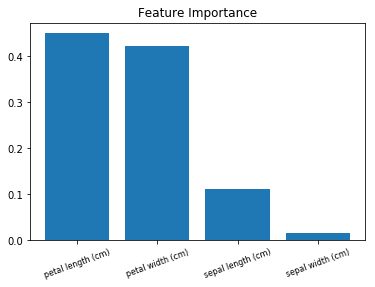

In [0]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

## Análise de Correlação

In [0]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


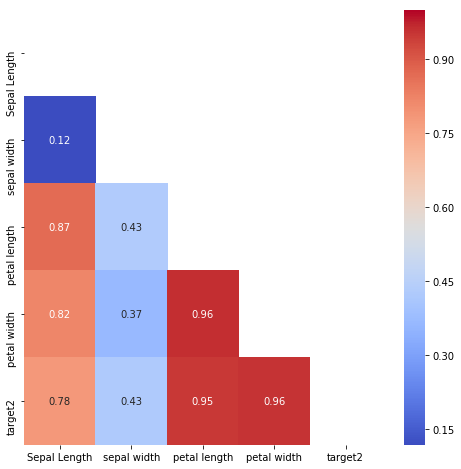

In [0]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Peta Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?

Visualmente fica mais fácil entender a magnitude da importância das duas mais importantes features.

### Usando SelectFromModel()

In [0]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [0]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(lIris_labels[feature_list_index])

Petal Length
Petal Width


Selecionando somente os atributos mais importantes:

In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

Quando tiver que treinar um modelo usando somente os atributos mais importantes, use:

In [0]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9333333333333333

In [0]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.9

As can be seen by the accuracy scores, our original model which contained all four features is 93.3% accurate while the our ‘limited’ model which contained only two features is 90% accurate. Thus, for a small cost in accuracy we halved the number of features in the model.

## 14. Feature Selection With XGBoost

In [0]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.datasets import load_iris

iris = load_iris()
X= iris['data']
y= iris['target']

df_iris = pd.DataFrame(np.c_[X, y], columns= np.append(iris['feature_names'], ['target']))
df_iris['target2']= df_iris['target']
# Create a list of feature names
lIris_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

df_iris['target'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_iris= df_iris.rename(columns={'sepal length (cm)': 'Sepal Length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})

df_iris.head()

,Sepal Length,sepal width,petal length,petal width,target,target2
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


In [0]:
# Create a random forest Regressor
clf = XGBClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

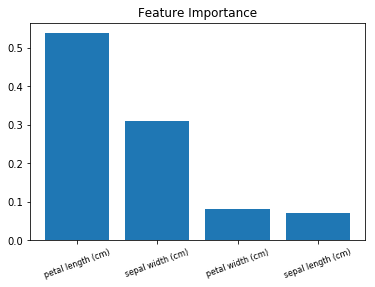

In [0]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

### Análise de Correlação

In [0]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


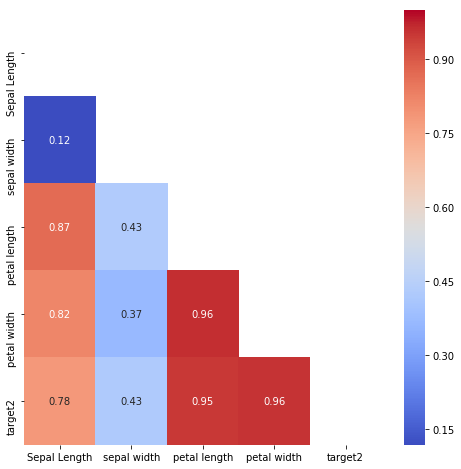

In [0]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Peta Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe.

## 15. Feature Selection using PCA (Principal Components Analysis)

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()
X= iris['data']
y= iris['target']

df_iris = pd.DataFrame(np.c_[X, y], columns= np.append(iris['feature_names'], ['target']))
df_iris['target2']= df_iris['target']
# Create a list of feature names
lIris_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

df_iris['target'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_iris= df_iris.rename(columns={'sepal length (cm)': 'Sepal Length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})

df_iris.head()

,Sepal Length,sepal width,petal length,petal width,target,target2
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


### Standardize the Data
* O PCA é afetado por escala, portanto, é necessário dimensionar as features/atributos antes de aplicar o PCA.
* Use o StandardScaler para padronizar os features/atributos usando com média = 0 e variância = 1.
* A propósito, esta é a principal transformação para muitos algoritmos de Machine Learning.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Standardizing as features de X:

In [0]:
X_STD= StandardScaler().fit_transform(X)

In [0]:
pca_2c = PCA(n_components=2)
pca_3c= PCA(n_components=3)

X_PCA_2c = pca_2c.fit_transform(X_STD)
X_PCA_3c = pca_3c.fit_transform(X_STD)
df_PCA_2c = pd.DataFrame(data = X_PCA_2c, columns = ['principal component 1', 'principal component 2'])

Vamos entender o que está acontecendo:

Primeiramente, observe nosso array X abaixo. Cada coluna desse array representa uma coluna do dataframe df_iris. Por exemplo, a primeira coluna são os dados da variável 'Sepal Length'. Identificou?

In [0]:
# Listando as primeiras 5 linhas de X
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Segundo, com a standardização, construimos o array X_STD, que mostramos abaixo:

In [0]:
X_STD[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Veja abaixo a média e desvio-padrão do array X_STD:

In [0]:
np.mean(X_STD),np.std(X_STD)

(-1.4684549872375404e-15, 1.0)

Temos média 0 e desvio-padrão 1, certo? É isso que queríamos.

Por fim, a partir de X_STD, construimos o array X_PCA, mostrado abaixo:

In [0]:
X_PCA_2c[0:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Portanto, reduzimos (ou resumimos) o array X_STD de 5 dimensões para um array de 2 dimensões.

Finalmente, o dataframe final é mostrado abaixo:

In [0]:
df_PCA_final_2c= pd.concat([df_PCA_2c, df_iris[['target']]], axis= 1)
df_PCA_final_2c.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Visualizar reultados

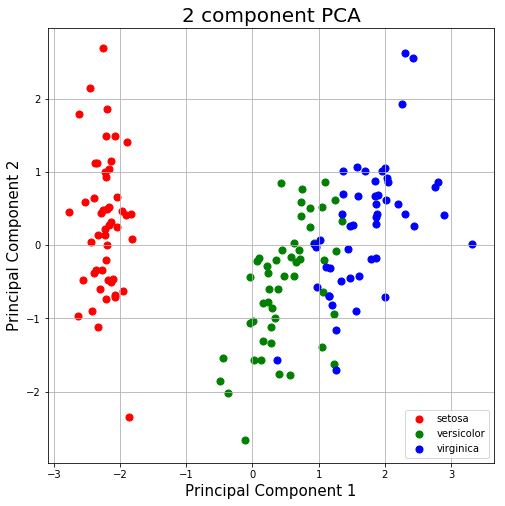

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA_final_2c['target'] == target
    ax.scatter(df_PCA_final_2c.loc[indicesToKeep, 'principal component 1']
               , df_PCA_final_2c.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

O que significa reduzir para 2 dimensões um array com 4 dimensões?

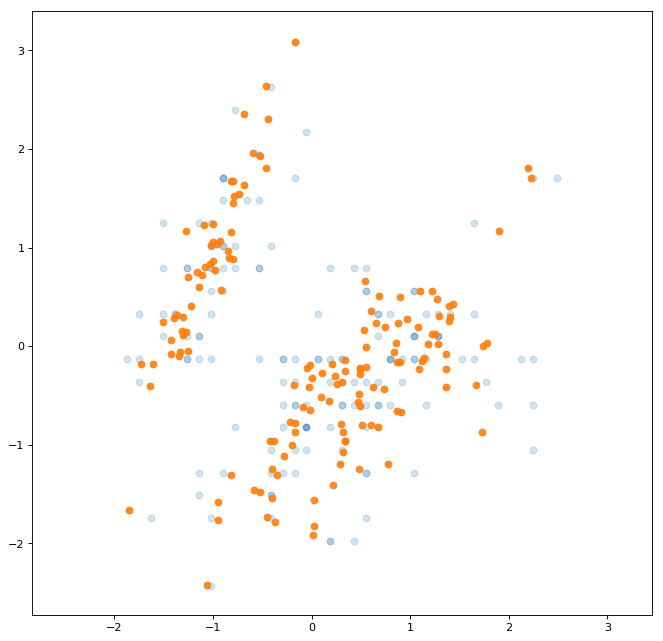

In [0]:
X_new = pca_2c.inverse_transform(X_PCA_2c)
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_STD[:, 0], X_STD[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal');

### Análise de Correlação

In [0]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


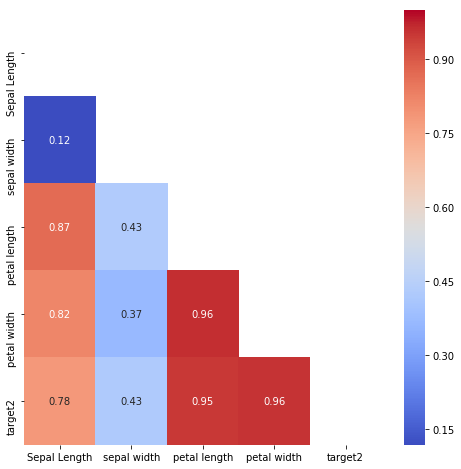

In [0]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Peta Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?

### Variância explicada
* Como vimos, reduzimos um array de informações de 4 dimensões para um array com 2 dimensões. Com isso, perde-se alguma informação relativa à variância. Mas quanto perdemos?

* A Variância Explicada (ou Explained Variance, em inglês), mede o quanto de informação (variação) foi atribuída a cada um dos componentes principais. Usando o atributo explain_variance_ratio_, é possível ver que o primeiro componente principal contém 72,77% da variação e o segundo componente principal contém 23,03% da variação. Juntos, os dois componentes contêm 95,80% das informações. Portanto, perdemos quase nada em termos de informação e o modelo não é prejudicado por esta redução.


A resposta à essa pergunta é:

In [0]:
pca_2c.explained_variance_ratio_

array([0.72962445, 0.22850762])

### Quantos componentes escolher

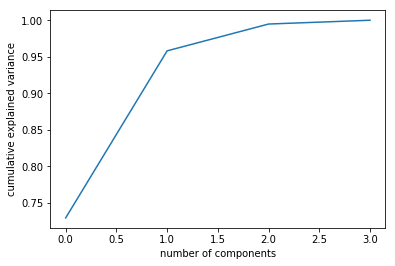

In [0]:
pca = PCA().fit(X_STD)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Interpretação**: Esta curva quantifica quanto da variância total de 4 dimensões está contida nos primeiros N componentes. Por exemplo, a primeira componente principal tem aproximadamente 95% da variação, enquanto que 2 componentes (os dois primeiros) explicam quase 100% da variabilidade. Portanto, em nosso caso, 2 componentes principais são suficientes para captar grande parte da variabilidade dos dados.

In [0]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### Medindo o impacto

#### Treinar o modelo com X_PCA

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier_2c = RandomForestClassifier(max_depth=2, random_state=0)
classifier_2c.fit(X_PCA_2c, y)

classifier_3c = RandomForestClassifier(max_depth=2, random_state=0)
classifier_3c.fit(X_PCA_3c, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Fazer as predições

In [0]:
y_pred_2c = classifier_2c.predict(X_PCA_2c)
y_pred_3c = classifier_3c.predict(X_PCA_3c)

#### Medindo a performance

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_2c = confusion_matrix(y, y_pred_2c)
cm_3c = confusion_matrix(y, y_pred_3c)

print(cm_2c)
print('*****')
print(cm_3c)

[[50  0  0]
 [ 0 38 12]
 [ 0 10 40]]
*****
[[50  0  0]
 [ 0 43  7]
 [ 0  8 42]]


In [0]:
print('Accuracy (2 componentes)', accuracy_score(y, y_pred_2c))
print('Accuracy (3 componentes)', accuracy_score(y, y_pred_3c))

Accuracy (2 componentes) 0.8533333333333334
Accuracy (3 componentes) 0.9


### Comentários
> Se quisermos um PCA que retenha 99% da variância, usamos:
pca = PCA(n_components=0.99, whiten=True)

> Se quisermos saber quantos atributos foram selecionados para se obter os 99% da variância, use:
pca.n_components_



# Exercícios
* Para cada dataframe a seguir, selecione os melhores atributos utilizando as técnicas:
    * SelectKBest
    * PCA
    * Random Forest

## Exercício 1 - Predict Breast Cancer
Veja esses exercícios: https://necromuralist.github.io/data_science/posts/predicting-cancer/

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X= cancer['data']
y= cancer['target']

df_cancer = pd.DataFrame(np.c_[X, y], columns= np.append(cancer['feature_names'], ['target']))
df_cancer['target'] = df_cancer['target'].map({0: 'malign', 1: 'benign'})
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malign


## Exercício 2 - Predict Boston Housing Price 
Tá aqui o exemplo: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [0]:
from sklearn.datasets import load_boston

boston = load_boston()
X= boston['data']
y= boston['target']

df_boston = pd.DataFrame(np.c_[X, y], columns= np.append(boston['feature_names'], ['target']))
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exercícios 3 - Diabetes


In [0]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X= diabetes['data']
y= diabetes['target']

df_diabetes = pd.DataFrame(np.c_[X, y], columns= np.append(diabetes['feature_names'], ['target']))
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
